# Dimensionality reduction 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Principal Component Analysis
- Linear dimensionality reduction method
- Find optimal orthogonal transformation such that covariance between the new dimensions is 0
    - Exploits eigen decomposition
    - By the orthogonal transformation, we could ignore the low variance direction to reduce the dimensionality of the features.
- Transformations
    - Find the basis (eigen vector of covariance matrix) such that independent each other
    - Diagonalization by changing the basis (inner-product of the original matrix and basis (new coordinate system)) 
    $
    \mathbf{X} \text{: Data original coordinates}
    \\
    \hat{\mathbf{X}} \text{: Centralized dataset}
    \\
    \mathbf{\Gamma} \text{: New coordinate system (Eigen vectors matrix)}
    \\
    \mathbf{\Lambda} \text{: Variance of respective direction (Eigen values matrix)}
    \\
    $$
    Eigen Decomposition of covariance matrix of original data
    $$
    \Sigma_{\hat{\mathbf{X}}} =  \mathbf{\Gamma} \mathbf{\Lambda} \mathbf{\Gamma}^T
    $
    
        New coordinate system
    $$\mathbf{\Gamma}$$

        Variance of each direction
        Covariance matrix on the new coordinate
    $$\mathbf{\Lambda}$$
    $$

# PCA
### Process of principal component analysis
Given input
Args
$\mathbf{X} \text{: array, shape[N, D]}$
- N : #samples, D : features dimensions

1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[\text{none}, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X -  1_N@x_m^T$$

3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X}}^T\hat{\mathbf{X}}$$

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero


6. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis (project the vectors in $\mathbf{X}$ onto the M-dim subspace).

    Transformed dataset
$$\mathbf{Y}=\mathbf{X}\mathbf{\Gamma}$$
    Covariance matrix of transformed dataset
$$\mathbf{\Sigma_\mathbf{Y}}=\mathbf{\Lambda}=\mathbf{\Gamma}^T{\mathbf{\Sigma_{\hat{\mathbf{X}}}}}\mathbf{\Gamma}$$

The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

N, D = X.shape[0], X.shape[1]

print(f"shape: {X.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for idx, x in enumerate(X):
    print(f'    {x}')

shape: (17, 2)
sample: 17
features: 2
    [-3 -2]
    [-2 -1]
    [-1  0]
    [0 1]
    [1 2]
    [2 3]
    [-2 -2]
    [-1 -1]
    [0 0]
    [1 1]
    [2 2]
    [-2 -3]
    [-1 -2]
    [ 0 -1]
    [1 0]
    [2 1]
    [3 2]


1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

In [3]:
# Axis = over which axis we take mean
# Keepdims(False) for the subsequent operation
# To use augumentation in the following operation, 
# we should squeeze the dimension of the derived mean of data vectors over samples
x_m = X.mean(0, keepdims=False)
print(x_m)
print(f"shape: {x_m.shape}")

[0. 0.]
shape: (2,)


2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[None, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X - x_m^T 1_N$$

In [4]:
X_hat = X - x_m[None, :]
## alternative
# rx_m = X.mean(0, keepdims=True)
# one_n = np.ones((N, 1))
# print(f"1_N shape: {one_n.shape}")
# X_hat = X - one_n @ rx_m
print(X_hat)
print(f"shape: {X_hat.shape}")

[[-3. -2.]
 [-2. -1.]
 [-1.  0.]
 [ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]
 [-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [-2. -3.]
 [-1. -2.]
 [ 0. -1.]
 [ 1.  0.]
 [ 2.  1.]
 [ 3.  2.]]
shape: (17, 2)


3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X^T}}\hat{\mathbf{X}}$$

In [5]:
C_X = X_hat.transpose() @ X_hat
C_X = C_X * (1/N)
# print(C_X)
print(f"shape: {C_X.shape}")

shape: (2, 2)


# Function to get covariance matrix

In [6]:
def get_covariance(X):
    """
    Args:
        X: array[N, D]
        data matrix including each data vectors on original space (Usually, Cartesian Space)
    Return:
        C_X: array[N, N]
        covariance matrix of the centralized data of given data matrix X
    """

    # taking mean over samples
    # x_m: array(D)

    x_m = X.mean(0, keepdims=False)
    
    # Centralized X
    # X_hat: array[N, D], dtype=Float

    X_hat = X - x_m[None, :]

    # Calculating the covariance matrix of the centralized data X_hat
    # C_X: array[N, N], dtype=Float

    C_X = X_hat.transpose() @ X_hat
    # Normalization
    C_X *= (1/N)

    return C_X

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

Using Numpy eigendecomposition function
- numpy.linalg.eig function

In [7]:
eig_values, eig_vectors = np.linalg.eig(C_X)
print(f"Gamma:{eig_vectors.shape}\n {eig_vectors}")
print(f"Lammda:{eig_values.shape}\n {eig_values}")
max_dim = np.argmax(eig_values)
print(max_dim)

Gamma:(2, 2)
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Lammda:(2,)
 [5.29411765 0.35294118]
0


In [8]:
I = np.eye(len(eig_values))
print(I.shape)

_dig_eig_values = I * eig_values
print(f"diagonal mat\n {_dig_eig_values}")

(2, 2)
diagonal mat
 [[5.29411765 0.        ]
 [0.         0.35294118]]


In [9]:
def get_eigen(Cov_x):
    """
    Args (1):
        Cov_x : array[D, D]
            Covariance matrix of the standardized given data matrix X
    
    Returns (2):
        g : array[D, D]
            eigen_vectors matrix
        
        l : array[D, D]
            eigen_values diagonal matrix
    """

    D = Cov_x.shape[0]

    l, g = np.linalg.eig(Cov_x)
    I = np.eye(D)
    l = I * l[None, :]

    return g, l


5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero

(-3.3, 3.3, -3.3, 3.3)

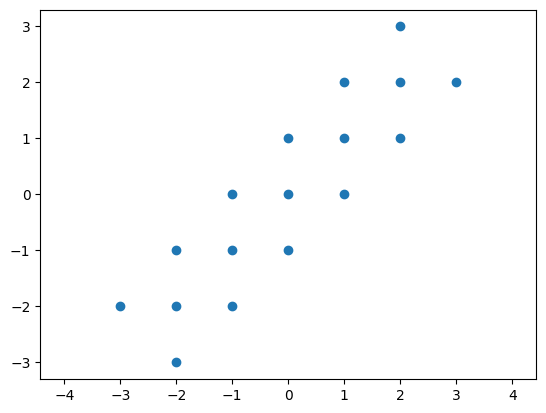

In [10]:
# plot given data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

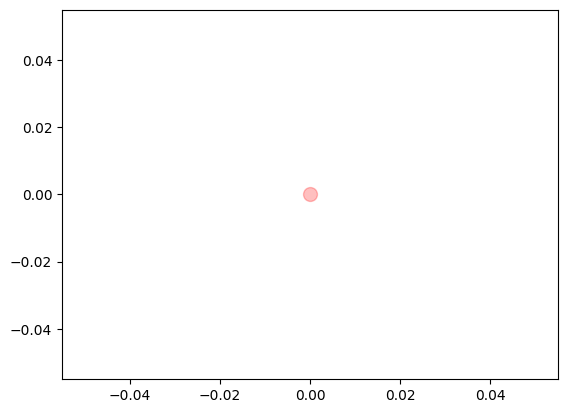

In [11]:
# plot the mean of the data
mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.25)

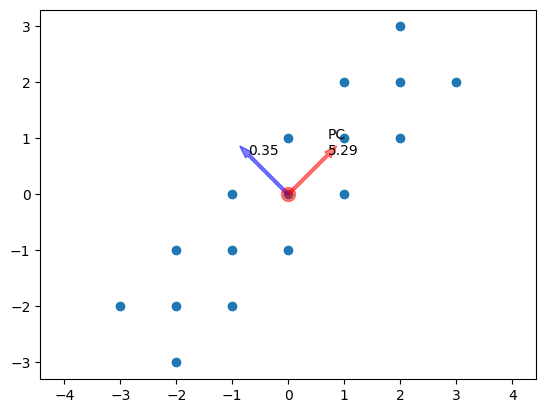

In [12]:
# plot summery

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.5)

Sigma = get_covariance(X)
g, l = get_eigen(Sigma)

max_dim = np.argmax(l)

for i in range(l.shape[0]):
    variance = l[i][i]
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [g[0][i], g[1][i]])
    else:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [g[0][i], g[1][i]])


## Singular Value Decomposition (SVD)

$$
\mathbf{M} = \mathbf{U} \cdot \mathbf{\Sigma} \cdot \mathbf{V}
$$

- $\mathbf{U}$: array[N, D]
    - Left Singular Matrix
- $\mathbf{\Sigma}$: array [D, D]
    - Singular Matrix
- $\mathbf{V}$: array[D, D]
    - Right Singular Matrix

## PCA and SVD
- Relationship
$$\lambda_i = \frac{s_i^2}{N}$$

In [13]:
# Given data
M = np.array([[1, 2], [6, 3], [0, 2]])

N, D = X.shape[0], X.shape[1]

print(f"shape: {M.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for _, m in enumerate(M):
    print(f'    {m}')

shape: (3, 2)
sample: 17
features: 2
    [1 2]
    [6 3]
    [0 2]


Using numpy linalg library
- np.linalg.svd

In [14]:
u, s, v = np.linalg.svd(X)
print(u.shape)
print(s.shape)
print(type(s))
print(s)
print(v.shape)
print(v)

(17, 17)
(2,)
<class 'numpy.ndarray'>
[9.48683298 2.44948974]
(2, 2)
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


[0. 0.]
0


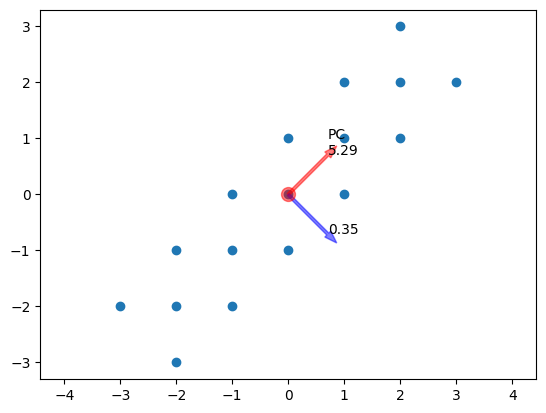

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
print(mean)
plt.plot(mean[0], mean[1], 'o', markersize = 10, color='red', alpha=0.5)

max_dim = np.argmax(s)
print(max_dim)

for i in range(len(s)):
    variance = s[i]**2 / (N)
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [v[i][0], v[i][1]])
    else:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [v[i][0], v[i][1]])
